In [75]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
# Load the statistical dataset
stats_df = pd.read_csv('mental_health_data.csv')
stats_df.head(3)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2018,2018,NV,Nevada,BRFSS,Mental Health,At least 14 recent mentally unhealthy days amo...,%,Crude Prevalence,21.6,...,26.8,Overall,Overall,POINT (-117.07184056399967 39.493240390000494),32,MTH,MTH2_0,CRDPREV,OVERALL,OVR
1,2020,2020,NV,Nevada,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Mean,4.1,...,5.8,Race/Ethnicity,"Black, non-Hispanic",POINT (-117.07184056399967 39.493240390000494),32,MTH,MTH1_0,MEAN,RACE,BLK
2,2018,2018,NV,Nevada,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Mean,5.0,...,5.6,Gender,Female,POINT (-117.07184056399967 39.493240390000494),32,MTH,MTH1_0,MEAN,GENDER,GENF


In [77]:
# Clean the DatatFrame by dropping unnecessary rows and columns
stats_df = stats_df.drop(columns = ["YearEnd", "Topic", "DataValueAlt", "DataSource", "DatavalueFootnote",
                                    "LocationID", "TopicID", "QuestionID", "DataValueTypeID",
                                   "StratificationCategoryID1", "StratificationID1"])
stats_df = stats_df.rename(columns = {"YearStart": "Year", "LocationAbbr": "StateAbbr", "LocationDesc": "State"})
stats_df = stats_df.dropna()

In [78]:
stats_df.head(3)

,Year,StateAbbr,State,Question,DataValueUnit,DataValueType,DataValue,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation
0,2018,NV,Nevada,At least 14 recent mentally unhealthy days amo...,%,Crude Prevalence,21.6,17.2,26.8,Overall,Overall,POINT (-117.07184056399967 39.493240390000494)
1,2020,NV,Nevada,Recent mentally unhealthy days among adults ag...,Number,Mean,4.1,2.4,5.8,Race/Ethnicity,"Black, non-Hispanic",POINT (-117.07184056399967 39.493240390000494)
2,2018,NV,Nevada,Recent mentally unhealthy days among adults ag...,Number,Mean,5.0,4.4,5.6,Gender,Female,POINT (-117.07184056399967 39.493240390000494)


In [97]:
# Export updated stats Dataframe to CSV File
stats_df.to_csv("updated_mental_health_data.csv", index = False)

In [99]:
texas_df = stats_df[stats_df['State'] == 'Texas']
texas_df = texas_df.sort_values(by='Year')
texas_df = texas_df.reset_index(drop=True)
texas_df.head(3)

,Year,StateAbbr,State,Question,DataValueUnit,DataValueType,DataValue,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation
0,2011,TX,Texas,Recent mentally unhealthy days among adults ag...,Number,Age-adjusted Mean,2.8,1.9,3.6,Race/Ethnicity,"Other, non-Hispanic",POINT (-99.42677020599967 31.827240407000488)
1,2011,TX,Texas,Recent mentally unhealthy days among adults ag...,Number,Age-adjusted Mean,4.2,3.9,4.5,Gender,Female,POINT (-99.42677020599967 31.827240407000488)
2,2011,TX,Texas,At least 14 recent mentally unhealthy days amo...,%,Crude Prevalence,13.8,11.0,17.1,Race/Ethnicity,Hispanic,POINT (-99.42677020599967 31.827240407000488)


In [100]:
# Export texas_df to CSV File
texas_df.to_csv("texas_mental_health.csv", index = False)

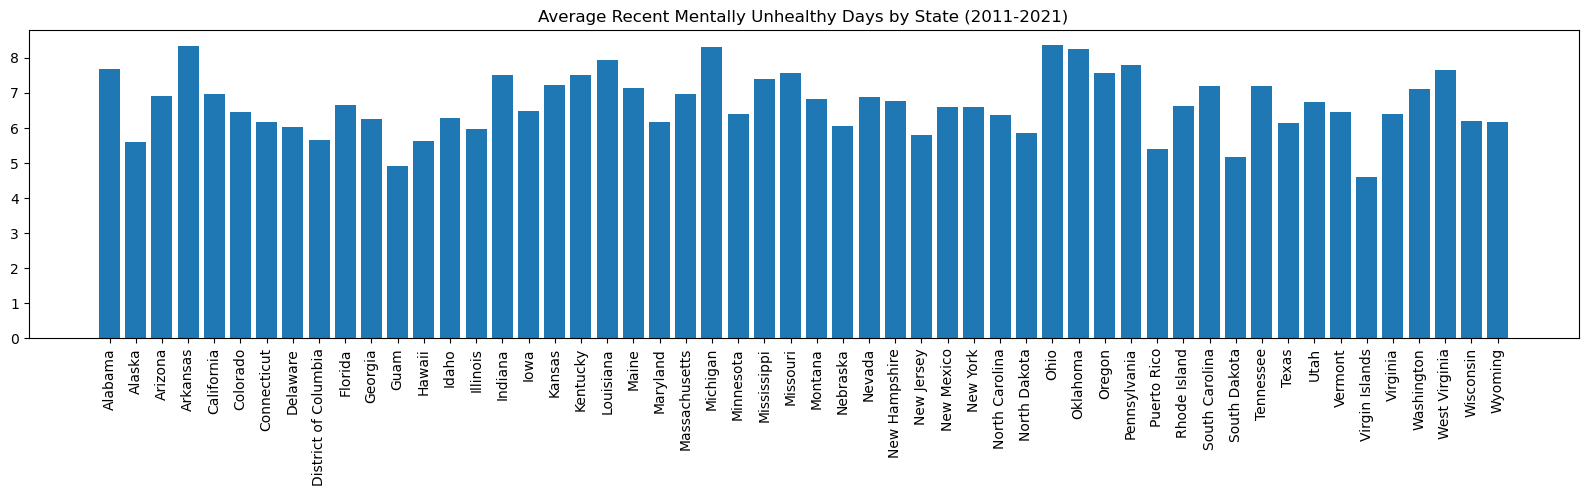

In [115]:
# Calculate the average mentally unhealthy days for each state
avg_bad_days = stats_df.groupby("State")["DataValue"].mean() 

# Get the states from the index of the groupby result
states = avg_bad_days.index

# Plot the data
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
plt.bar(states, avg_bad_days)
plt.title("Average Recent Mentally Unhealthy Days by State (2011-2021)")
plt.show()

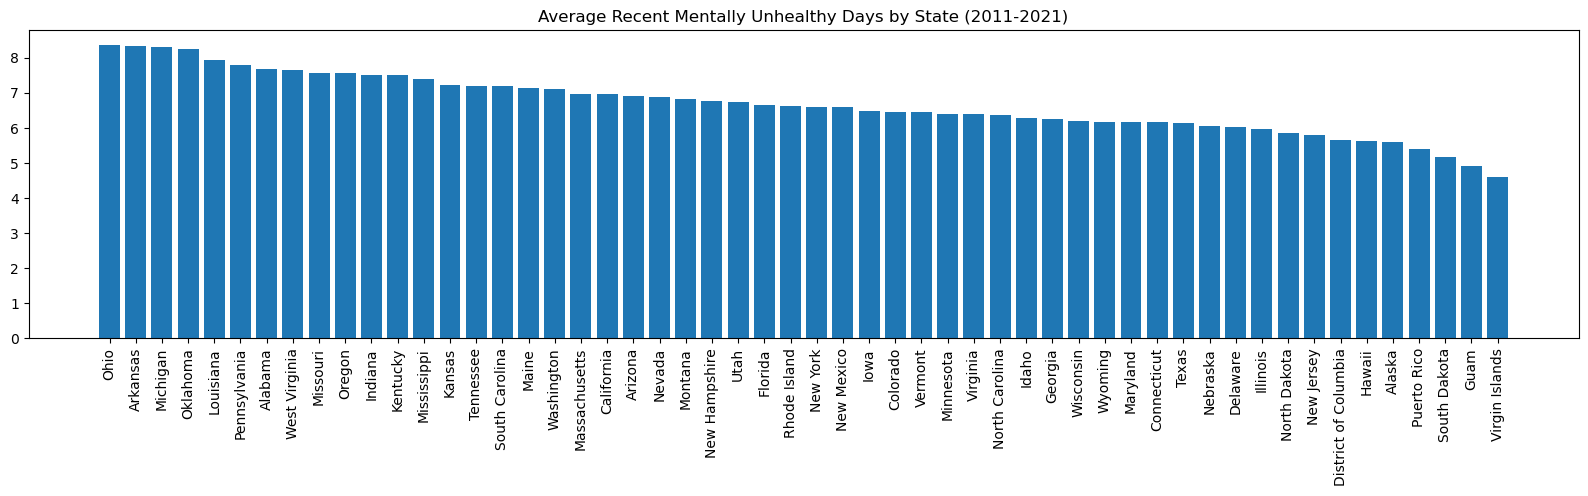

In [114]:
# Sort states by descending average recent mentally unhealthy days

# Calculate the average mentally unhealthy days for each state
avg_bad_days = stats_df.groupby("State")["DataValue"].mean()

# Sort the values descending
avg_bad_days = avg_bad_days.sort_values(ascending=False)  

# Get the states from the index of the groupby result
states = avg_bad_days.index

# Plot the data
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
plt.bar(states, avg_bad_days)
plt.title("Average Recent Mentally Unhealthy Days by State (2011-2021)")
plt.show()

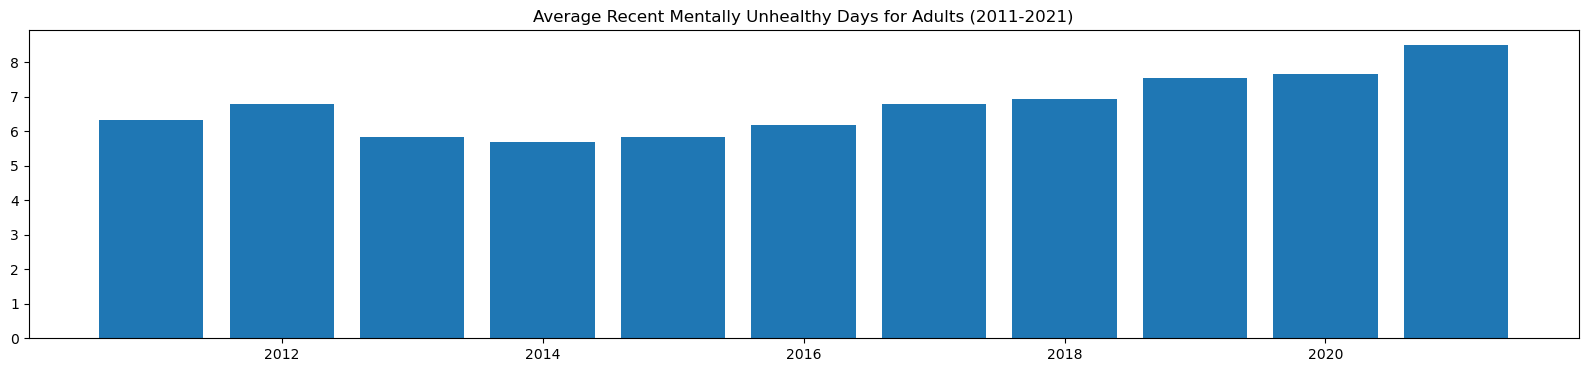

In [110]:
# Calculate the average mentally unhealthy days for each state
avg_bad_days2 = stats_df.groupby("Year")["DataValue"].mean()

# Get the states from the index of the groupby result
states = avg_bad_days2.index

# Plot the data
plt.figure(figsize=(20,4))
plt.xticks(rotation=0)
plt.bar(states, avg_bad_days2)
plt.title("Average Recent Mentally Unhealthy Days for Adults (2011-2021)")
plt.show()

In [82]:
#Filter unhealthy days by race
question = stats_df[stats_df['Question'] == 'Recent mentally unhealthy days among adults aged >= 18 years']
race = question[question['StratificationCategory1'] == 'Race/Ethnicity']
race_df = race[['Year', 'State', 'Question', 'DataValueType', 'DataValue', 'Stratification1']]
race_df = race_df.rename(columns = {"Stratification1": "Race/Ethnicity"})
race_df = race_df.sort_values(by=['State', 'Year', 'Race/Ethnicity'])

In [83]:
# Use overall mean opposed to age-adjusted mean
race_df = race_df[race_df['DataValueType'] == 'Mean']
race_df = race_df.reset_index(drop=True)
race_df.head()

,Year,State,Question,DataValueType,DataValue,Race/Ethnicity
0,2011,Alabama,Recent mentally unhealthy days among adults ag...,Mean,5.0,"Black, non-Hispanic"
1,2011,Alabama,Recent mentally unhealthy days among adults ag...,Mean,5.6,Hispanic
2,2011,Alabama,Recent mentally unhealthy days among adults ag...,Mean,5.7,"Other, non-Hispanic"
3,2011,Alabama,Recent mentally unhealthy days among adults ag...,Mean,4.6,"White, non-Hispanic"
4,2013,Alabama,Recent mentally unhealthy days among adults ag...,Mean,4.4,"Black, non-Hispanic"


In [98]:
# Export race_df to CSV File
race_df.to_csv("race_ethnicity.csv", index = False)

In [84]:
#Filter unhealthy days by gender
question = stats_df[stats_df['Question'] == 'Recent mentally unhealthy days among adults aged >= 18 years']
gender = question[question['StratificationCategory1'] == 'Gender']
gender_df = gender[['Year', 'State', 'Question', 'DataValueType', 'DataValue', 'Stratification1']]
gender_df = gender_df.rename(columns = {"Stratification1": "Gender"})
gender_df = gender_df.sort_values(by=['State', 'Year', 'Gender'])

In [85]:
# Use overall mean opposed to age-adjusted mean
gender_df = gender_df[gender_df['DataValueType'] == 'Mean']
gender_df = gender_df.reset_index(drop=True)
gender_df

,Year,State,Question,DataValueType,DataValue,Gender
0,2011,Alabama,Recent mentally unhealthy days among adults ag...,Mean,5.5,Female
1,2011,Alabama,Recent mentally unhealthy days among adults ag...,Mean,4.1,Male
2,2012,Alabama,Recent mentally unhealthy days among adults ag...,Mean,5.9,Female
3,2012,Alabama,Recent mentally unhealthy days among adults ag...,Mean,4.4,Male
4,2013,Alabama,Recent mentally unhealthy days among adults ag...,Mean,5.3,Female
...,...,...,...,...,...,...
1161,2019,Wyoming,Recent mentally unhealthy days among adults ag...,Mean,3.3,Male
1162,2020,Wyoming,Recent mentally unhealthy days among adults ag...,Mean,4.9,Female
1163,2020,Wyoming,Recent mentally unhealthy days among adults ag...,Mean,3.0,Male
1164,2021,Wyoming,Recent mentally unhealthy days among adults ag...,Mean,5.7,Female


In [86]:
# Export to CSV File
gender_df.to_csv("gender.csv", index = False)

In [87]:
# Filter average number of unhealthy days by gender in 2020
year_2020_df = gender_df[gender_df['Year'] == 2020]
year_2020_df.head(10)

,Year,State,Question,DataValueType,DataValue,Gender
18,2020,Alabama,Recent mentally unhealthy days among adults ag...,Mean,5.9,Female
19,2020,Alabama,Recent mentally unhealthy days among adults ag...,Mean,3.8,Male
40,2020,Alaska,Recent mentally unhealthy days among adults ag...,Mean,4.4,Female
41,2020,Alaska,Recent mentally unhealthy days among adults ag...,Mean,2.4,Male
62,2020,Arizona,Recent mentally unhealthy days among adults ag...,Mean,4.9,Female
63,2020,Arizona,Recent mentally unhealthy days among adults ag...,Mean,3.5,Male
84,2020,Arkansas,Recent mentally unhealthy days among adults ag...,Mean,6.3,Female
85,2020,Arkansas,Recent mentally unhealthy days among adults ag...,Mean,4.1,Male
106,2020,California,Recent mentally unhealthy days among adults ag...,Mean,4.5,Female
107,2020,California,Recent mentally unhealthy days among adults ag...,Mean,3.6,Male


In [88]:
# Filter average number of unhealthy days by gender in 2020
race_2020_df = race_df[race_df['Year'] == 2020]
race_2020_df

,Year,State,Question,DataValueType,DataValue,Race/Ethnicity
35,2020,Alabama,Recent mentally unhealthy days among adults ag...,Mean,5.3,"Black, non-Hispanic"
36,2020,Alabama,Recent mentally unhealthy days among adults ag...,Mean,5.0,Hispanic
37,2020,Alabama,Recent mentally unhealthy days among adults ag...,Mean,5.1,"Multiracial, non-Hispanic"
38,2020,Alabama,Recent mentally unhealthy days among adults ag...,Mean,5.8,"Other, non-Hispanic"
39,2020,Alabama,Recent mentally unhealthy days among adults ag...,Mean,4.7,"White, non-Hispanic"
...,...,...,...,...,...,...
2306,2020,Wisconsin,Recent mentally unhealthy days among adults ag...,Mean,4.0,"White, non-Hispanic"
2337,2020,Wyoming,Recent mentally unhealthy days among adults ag...,Mean,5.1,Hispanic
2338,2020,Wyoming,Recent mentally unhealthy days among adults ag...,Mean,7.6,"Multiracial, non-Hispanic"
2339,2020,Wyoming,Recent mentally unhealthy days among adults ag...,Mean,5.9,"Other, non-Hispanic"


In [89]:
# Filter average number of unhealthy days by gender in Texas
texas_gender_df = gender_df[gender_df['State'] == 'Texas']
texas_gender_df.head(10)

,Year,State,Question,DataValueType,DataValue,Gender
986,2011,Texas,Recent mentally unhealthy days among adults ag...,Mean,4.2,Female
987,2011,Texas,Recent mentally unhealthy days among adults ag...,Mean,2.9,Male
988,2012,Texas,Recent mentally unhealthy days among adults ag...,Mean,4.1,Female
989,2012,Texas,Recent mentally unhealthy days among adults ag...,Mean,3.2,Male
990,2013,Texas,Recent mentally unhealthy days among adults ag...,Mean,3.9,Female
991,2013,Texas,Recent mentally unhealthy days among adults ag...,Mean,2.5,Male
992,2014,Texas,Recent mentally unhealthy days among adults ag...,Mean,3.5,Female
993,2014,Texas,Recent mentally unhealthy days among adults ag...,Mean,2.5,Male
994,2015,Texas,Recent mentally unhealthy days among adults ag...,Mean,3.6,Female
995,2015,Texas,Recent mentally unhealthy days among adults ag...,Mean,2.8,Male


In [90]:
# Filter average number of unhealthy days by race in Texas
texas_race_df = race_df[race_df['State'] == 'Texas']
texas_race_df.head(10)

,Year,State,Question,DataValueType,DataValue,Race/Ethnicity
1991,2011,Texas,Recent mentally unhealthy days among adults ag...,Mean,3.9,"Black, non-Hispanic"
1992,2011,Texas,Recent mentally unhealthy days among adults ag...,Mean,3.6,Hispanic
1993,2011,Texas,Recent mentally unhealthy days among adults ag...,Mean,8.0,"Multiracial, non-Hispanic"
1994,2011,Texas,Recent mentally unhealthy days among adults ag...,Mean,2.7,"Other, non-Hispanic"
1995,2011,Texas,Recent mentally unhealthy days among adults ag...,Mean,3.5,"White, non-Hispanic"
1996,2013,Texas,Recent mentally unhealthy days among adults ag...,Mean,4.3,"Black, non-Hispanic"
1997,2013,Texas,Recent mentally unhealthy days among adults ag...,Mean,3.0,Hispanic
1998,2013,Texas,Recent mentally unhealthy days among adults ag...,Mean,5.1,"Multiracial, non-Hispanic"
1999,2013,Texas,Recent mentally unhealthy days among adults ag...,Mean,2.6,"Other, non-Hispanic"
2000,2013,Texas,Recent mentally unhealthy days among adults ag...,Mean,3.0,"White, non-Hispanic"


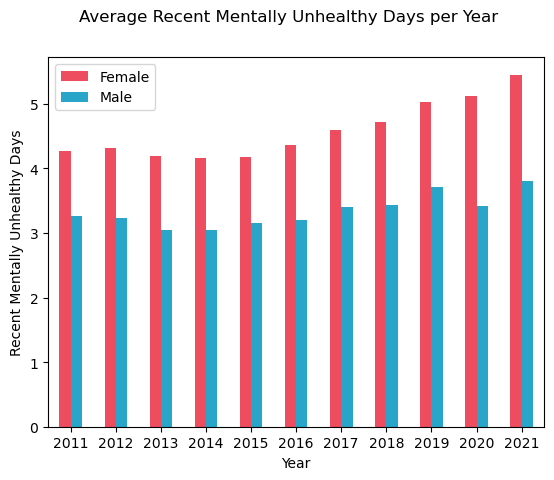

In [102]:
# Display average number of mentally unhealthy days by gender
# Filter df to only needed columns
filtered_gender_df = gender_df[['Year', 'DataValue', 'Gender']]

# Groupby year and gender, aggregate mean DataValue
grouped = filtered_gender_df.groupby(['Year', 'Gender'])['DataValue'].mean().unstack()

#Set color palette
colors = ['#ed4d5e', '#28a5c9']

# Plot bars 
fig, ax = plt.subplots()
grouped.plot(kind='bar', ax=ax, rot=0, color = colors ) 

ax.set_xlabel("Year")
ax.set_ylabel("Recent Mentally Unhealthy Days")
ax.legend(["Female", "Male"]);

fig.suptitle("Average Recent Mentally Unhealthy Days per Year");

plt.show()

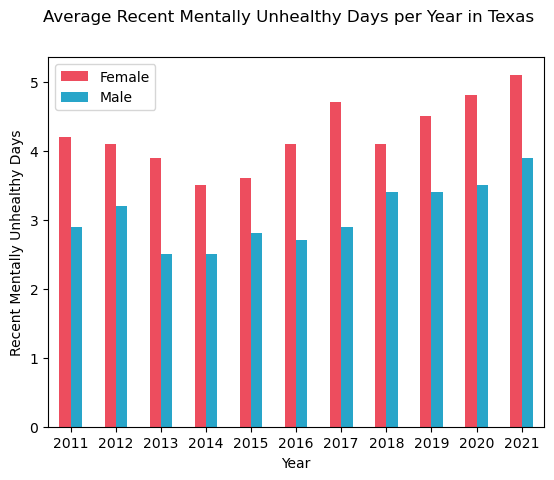

In [107]:
# Display average number of mentally unhealthy days by gender in Texas
# Filter df to only needed columns
filtered_tx_df = texas_gender_df[['Year', 'DataValue', 'Gender']]

# Groupby year and gender, aggregate mean DataValue
grouped = filtered_tx_df.groupby(['Year', 'Gender'])['DataValue'].mean().unstack()

#Set color palette
colors = ['#ed4d5e', '#28a5c9']

# Plot bars 
fig, ax = plt.subplots()
grouped.plot(kind='bar', ax=ax, rot=0, color = colors) 

ax.set_xlabel("Year")
ax.set_ylabel("Recent Mentally Unhealthy Days")
ax.legend(["Female", "Male"]);

fig.suptitle("Average Recent Mentally Unhealthy Days per Year in Texas"); 

plt.show()

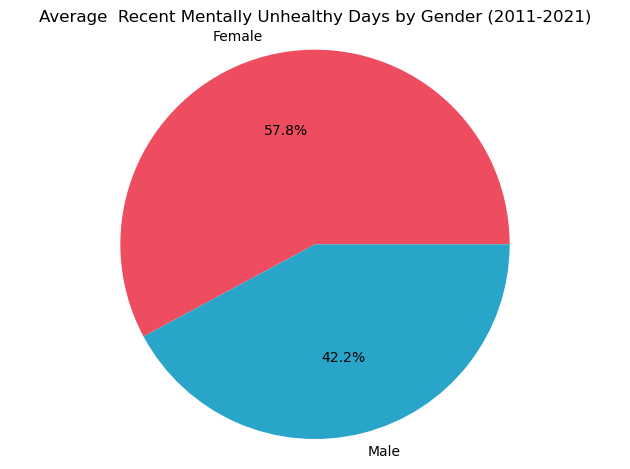

In [103]:
# Generate a pie plot showing the distribution of unhealthy days by gender
# Dataframe with gender and average unhealthy days 
pie_gender_df = gender_df.groupby('Gender')[['DataValue']].mean()

# Set color palette
colors = ['#ed4d5e', '#28a5c9']  

# Create pie chart
fig, ax = plt.subplots()
ax.pie(pie_gender_df['DataValue'], labels=pie_gender_df.index, colors=colors, autopct='%1.1f%%')
ax.axis('equal')

ax.set_title("Average  Recent Mentally Unhealthy Days by Gender (2011-2021)")
plt.tight_layout()
plt.show()

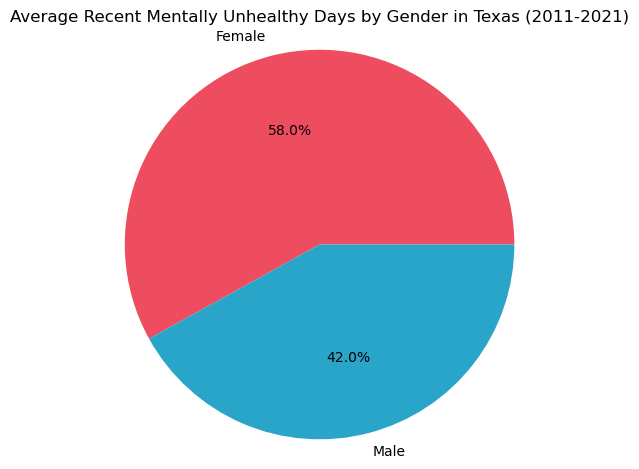

In [104]:
# Generate a pie plot showing the distribution of unhealthy days by gender in Texas
# Dataframe with gender and average unhealthy days 
tx_gender = texas_gender_df.groupby('Gender')[['DataValue']].mean()

# Set color palette
colors = ['#ed4d5e', '#28a5c9']  

# Create pie chart
fig, ax = plt.subplots()
ax.pie(tx_gender['DataValue'], labels=tx_gender.index, colors=colors, autopct='%1.1f%%')
ax.axis('equal')

ax.set_title("Average Recent Mentally Unhealthy Days by Gender in Texas (2011-2021)")
plt.tight_layout()
plt.show()

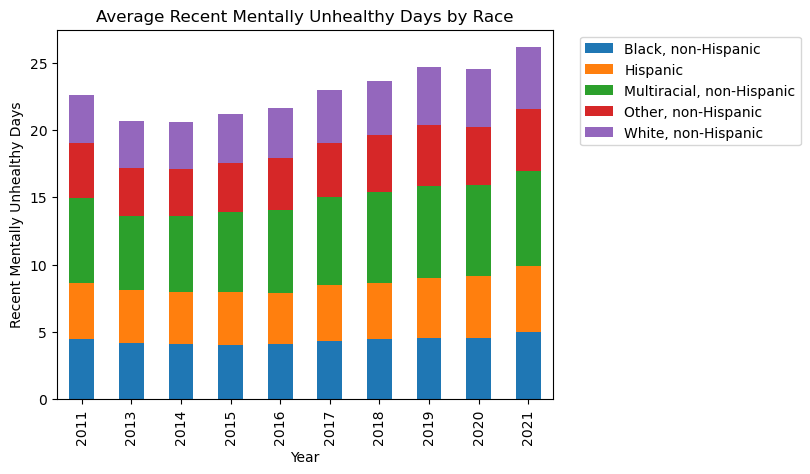

In [105]:
# Generate a stacked bar chart displaying average unhealthy days by race
# Filter dataframe 
filtered_race_df = race_df[['Year', 'DataValue', 'Race/Ethnicity']]

# Groupby year and race, aggregate mean DataValue
grouped = filtered_race_df.groupby(['Year', 'Race/Ethnicity'])['DataValue'].mean()  

# Unstack the Race/Ethnicity into columns
grouped = grouped.unstack()

# Plot stacked bars
ax = grouped.plot(kind='bar', stacked=True)

ax.set_xlabel('Year')
ax.set_ylabel('Recent Mentally Unhealthy Days')
ax.legend(bbox_to_anchor=(1.04,1)) 
plt.title('Average Recent Mentally Unhealthy Days by Race')

plt.show()

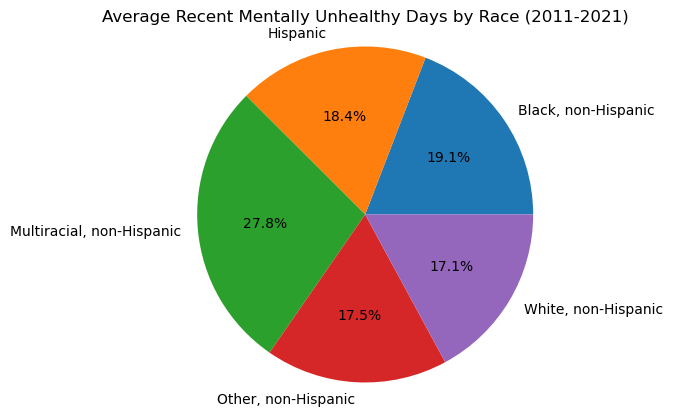

In [106]:
# Generate a pie plot showing the distribution of unhealthy days by race
# Group by race and aggregate mean  
pie_race_df = race_df.groupby('Race/Ethnicity')[['DataValue']].mean()

# Reset index to keep races as column 
pie_race_df = pie_race_df.reset_index() 

# Create pie chart
fig, ax = plt.subplots()
ax.pie(pie_race_df['DataValue'], labels=pie_race_df['Race/Ethnicity'], autopct='%1.1f%%')
ax.axis('equal')

ax.set_title("Average Recent Mentally Unhealthy Days by Race (2011-2021)") 

plt.show()